In [1]:
# Import Libraries and Modules used for class
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import lxml
import seaborn
import statsmodels
import patsy
import requests
from datetime import datetime, timedelta

# Milestone 2 (Weeks 5 & 6)

Cleaning/Formatting Flat File Source
Perform at least 5 data transformation and/or cleansing steps to your flat file data.  
  
Examples:  
 Replace Headers  
 Format data into a more readable format  
 Identify outliers and bad data  
 Find duplicates  
 Fix casing or inconsistent values  
 Conduct Fuzzy Matching  
 
You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

In [2]:
#read file / import
imwc19 = pd.read_excel('2019_Ironman_World_Championship_ Results.xlsx')

In [3]:
# review data
imwc19.head()

,BIB,Name,Country,Gender,Division,Swim,Bike,Run,Overall,Division Rank,Gender Rank,Overall Rank,T1,T2
0,4,"Frodeno, Jan",DEU,Male,MPRO,00:47:31,04:16:02,02:42:43,07:51:13,1,1,1,00:01:58,00:02:59
1,6,"O'donnell, Tim",USA,Male,MPRO,00:47:38,04:18:11,02:49:45,07:59:41,2,2,2,00:02:01,00:02:06
2,5,"Kienle, Sebastian",DEU,Male,MPRO,00:52:17,04:15:04,02:49:56,08:02:04,3,3,3,00:02:12,00:02:35
3,14,"Hoffman, Ben",USA,Male,MPRO,00:51:01,04:24:01,02:43:08,08:02:52,4,4,4,00:02:25,00:02:17
4,11,"Wurf, Cameron",AUS,Male,MPRO,00:52:25,04:14:44,02:55:03,08:06:41,5,5,5,00:02:07,00:02:22


In [4]:
# Data transformation 1
# drop columns
imwc19.drop(labels=['Division Rank'],axis=1,inplace=True)
imwc19.drop(labels=['Gender Rank'],axis=1,inplace=True)
imwc19.drop(labels=['BIB'],axis=1,inplace=True)
imwc19.drop(labels=['Division'],axis=1,inplace=True)

In [5]:
# Data transformation 2
# create two new columns for first & last names, strip the blanks
imwc19['LName'] = imwc19['Name'].apply(lambda x: x.split(',')[0])
imwc19['FName'] = imwc19['Name'].apply(lambda x: x.split(',')[1])
imwc19['FName'] = imwc19['FName'].str.strip()
imwc19['LName'] = imwc19['LName'].str.strip()

In [6]:
# Data transformation 3
# rename two columns
imwc19 = imwc19.rename(columns={'Overall Rank':'Place','Overall':'Total'})

In [7]:
# Data transformation 4
# find missing, likely from DNFs or DNS (did not finish or start)
imwc19.isnull().sum()

Name         0
Country      2
Gender       0
Swim        79
Bike       119
Run        173
Total      176
Place        0
T1          81
T2         136
LName        0
FName        0
dtype: int64

In [8]:
# remove records with n/a from total, which would indicate a DNF or DNS as it was largest category
imwc19 = imwc19[imwc19['Total'].notna()]

In [9]:
# confirm majority of NAs were cleared
imwc19.isnull().sum()

Name       0
Country    2
Gender     0
Swim       0
Bike       0
Run        0
Total      0
Place      0
T1         0
T2         0
LName      0
FName      0
dtype: int64

In [10]:
# determine column names in DF
cols = list(imwc19.columns.values)
cols

['Name',
 'Country',
 'Gender',
 'Swim',
 'Bike',
 'Run',
 'Total',
 'Place',
 'T1',
 'T2',
 'LName',
 'FName']

In [11]:
# Data transformation 5
# rearrange the columns
imwc19 = imwc19[[ 'Place',
 'Name',
 'FName',
 'LName',            
 'Country',
 'Gender',
 'Swim',
 'T1',
 'Bike',
 'T2',                 
 'Run',
 'Total']]

In [12]:
imwc19.head()

,Place,Name,FName,LName,Country,Gender,Swim,T1,Bike,T2,Run,Total
0,1,"Frodeno, Jan",Jan,Frodeno,DEU,Male,00:47:31,00:01:58,04:16:02,00:02:59,02:42:43,07:51:13
1,2,"O'donnell, Tim",Tim,O'donnell,USA,Male,00:47:38,00:02:01,04:18:11,00:02:06,02:49:45,07:59:41
2,3,"Kienle, Sebastian",Sebastian,Kienle,DEU,Male,00:52:17,00:02:12,04:15:04,00:02:35,02:49:56,08:02:04
3,4,"Hoffman, Ben",Ben,Hoffman,USA,Male,00:51:01,00:02:25,04:24:01,00:02:17,02:43:08,08:02:52
4,5,"Wurf, Cameron",Cameron,Wurf,AUS,Male,00:52:25,00:02:07,04:14:44,00:02:22,02:55:03,08:06:41


In [13]:
imwc19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2257
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Place    2258 non-null   object
 1   Name     2258 non-null   object
 2   FName    2258 non-null   object
 3   LName    2258 non-null   object
 4   Country  2256 non-null   object
 5   Gender   2258 non-null   object
 6   Swim     2258 non-null   object
 7   T1       2258 non-null   object
 8   Bike     2258 non-null   object
 9   T2       2258 non-null   object
 10  Run      2258 non-null   object
 11  Total    2258 non-null   object
dtypes: object(12)
memory usage: 229.3+ KB


In [14]:
# useful stats
imwc19.describe()

,Place,Name,FName,LName,Country,Gender,Swim,T1,Bike,T2,Run,Total
count,2258,2258,2258,2258,2256,2258,2258,2258,2258,2258,2258,2258
unique,2136,2257,1225,2033,73,2,1492,490,1999,582,2014,2136
top,1384,"Wilson, Craig",David,Smith,USA,Male,01:03:01,00:04:07,05:27:49,00:03:15,04:28:22,09:39:29
freq,3,2,36,14,587,1649,6,20,4,16,3,3


In [15]:
# Search for duplicates based on name & country
imwc19[imwc19.duplicated(['Name','Country'])]
# NO DUPLICATES FOUND AFTER REMOVING NAs

,Place,Name,FName,LName,Country,Gender,Swim,T1,Bike,T2,Run,Total


In [16]:
# No longer applicable after removing NAs
# review duplicates
# imwc19.loc[imwc19['Name'] == 'Clark, David']

In [17]:
# review the records with null values, they provide no value, will discard
imwc19[imwc19.isna().any(axis=1)]

,Place,Name,FName,LName,Country,Gender,Swim,T1,Bike,T2,Run,Total
446,447,"Gonzalo, Pardo",Pardo,Gonzalo,NaN,Male,01:07:37,00:03:39,05:14:06,00:04:43,03:21:59,09:52:04
1102,1103,"Hosokawa, Eriko",Eriko,Hosokawa,NaN,Female,01:10:31,00:04:12,06:07:53,00:02:32,03:28:19,10:53:27


In [18]:
# remove records with n/a
imwc19 = imwc19.dropna(how='any',axis=0) 

In [19]:
# reset the index and sort by total time
imwc19=imwc19.sort_values(by=['Total'])
imwc19=imwc19.reset_index(drop=True)

In [20]:
#reset place based on total time
imwc19['Place'] = imwc19.index + 1

In [21]:
#add source
imwc19['Source'] = 'imwc19'

In [22]:
# create a DF of countries with over 50 finishers
overfiddy=pd.DataFrame(imwc19['Country'].value_counts()
                       [imwc19['Country'].value_counts()>50]).rename(columns={'Country':'Finishers'})

In [23]:
overfiddy

,Finishers
USA,587
DEU,266
AUS,185
GBR,150
CAN,94
FRA,87
BRA,76
JPN,65
CHE,54
ESP,53


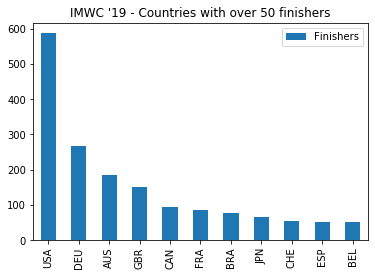

In [24]:
# plot countries with over 50 finishers
overfiddy.plot.bar(title='IMWC \'19 - Countries with over 50 finishers')

In [25]:
imwc19.to_excel("imwc19_output.xlsx")  